In [1]:
from pomegranate import*

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde
import json

In [3]:
from hmm_helpers import build_hmm
from helpers import WindowType

In [4]:
sns.set(color_codes=True)

In [5]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [6]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
hmm.freeze()

Working with state:  GAP_STATE
Working with state:  STATE_0
Working with state:  STATE_1
Working with state:  STATE_2
Working with state:  STATE_3
Working with state:  HMM_Model-start
Working with state:  HMM_Model-end
Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


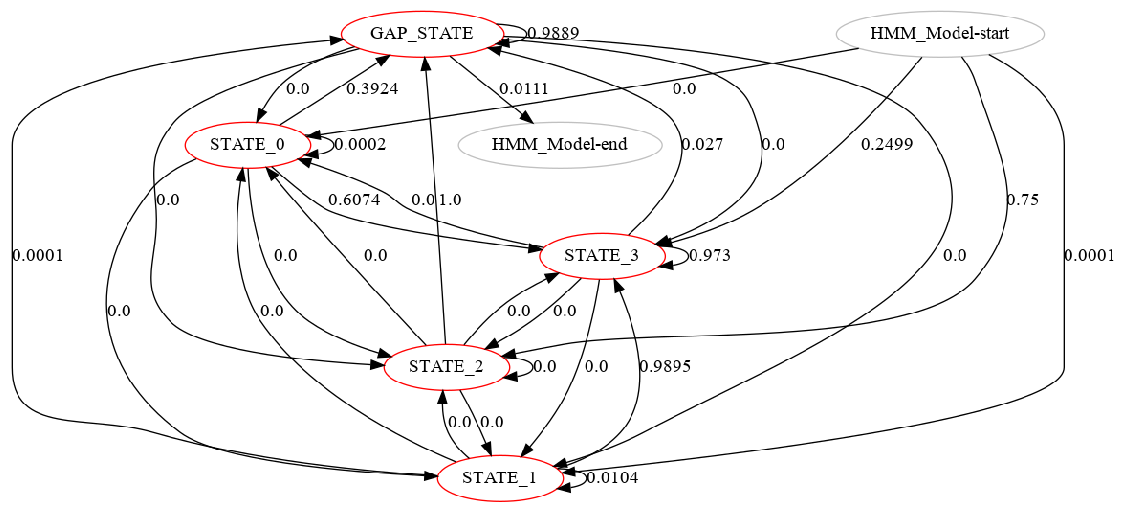

In [7]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [8]:
# load a sequence other than that we trained the HMM
from train import make_window_regions
from helpers import read_configuration_file

In [9]:
configuration=read_configuration_file("config.json")


In [10]:
regions = make_window_regions(configuration=configuration)

INFO: Window size: 100
INFO: Chromosome:  chr1
INFO: Regions used {'start': [1000000], 'end': [10000000]}
INFO: Start index: 1000000
INFO: End index:   10000000
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 8745784
INFO: Extracting common bases


INFO: Estimated number of windows: 87457 
INFO: Number of WGA windows: 90026
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 8948176
INFO: Extracting common bases


INFO: Estimated number of windows: 89481 
INFO: Number of non-wga windows: 90002
INFO: Marking N  windows with: -999
INFO: Number of mixed windows: 90002
INFO: Number of windows after outlier removal: 85822


In [11]:
# create a sequence from region 0
sequence = regions[0].get_sequence(size=10, window_type=WindowType.BOTH)


In [14]:
print(sequence)

[(5.44, 5.35), (3.42, 7.35), (6.56, 8.82), (2.91, 10.73), (4.45, 19.26), (4.27, 10.31), (3.66, 12.84), (7.46, 14.77), (5.3, 13.72), (5.27, 13.44)]


Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [15]:
viterbi_path=hmm.viterbi(sequence)

In [18]:
print("Log-probability of ML Viterbi path: ", viterbi_path[0])

if viterbi_path[1] is not None:
    print("Viterbi path length: ", len(viterbi_path[1]))

    for item in range(len(sequence)):
        print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))


Log-probability of ML Viterbi path:  -inf


In [26]:
n_seqs=100

In [29]:

sequences = regions[0].get_region_as_sequences(size=20, window_type=WindowType.BOTH, n_seqs=n_seqs)

# make sure we have as many sequences we requested
assert len(sequences) == n_seqs, "Invalid number of sequences"

In [30]:
for seq in sequences:
    
    #print(seq)
    
    viterbi_path=hmm.viterbi(sequence)
    
    print("Log-probability of ML Viterbi path: ", viterbi_path[0])

    if viterbi_path[1] is not None:
        print("Viterbi path length: ", len(viterbi_path[1]))

        for item in range(len(sequence)):
            print("sequnce item: {0} state {1}".format(sequence[item], viterbi_path[1][item][1].name))

Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path:  -inf
Log-probability of ML Viterbi path

In [31]:
p_d_given_m = hmm.log_probability(sequence=sequence)
print("P(D|M): ", p_d_given_m)
print(hmm.predict_proba(sequence))

P(D|M):  -inf
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
